<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/ev4MachineLearning/blob/main/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Regresión Logística

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Cargar los datos
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

df.columns = df.columns.str.strip()

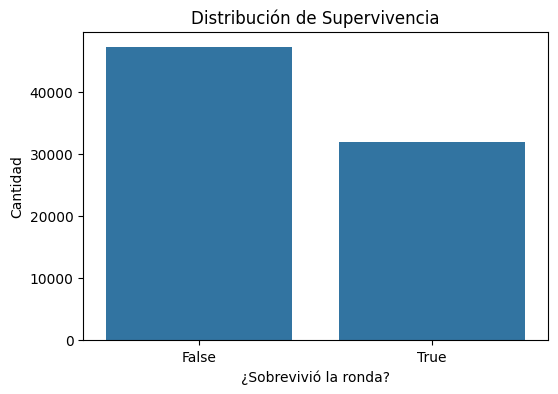


Métricas del modelo de Regresión Logística:
              precision    recall  f1-score   support

       False       0.70      0.81      0.75      9485
        True       0.63      0.47      0.54      6347

    accuracy                           0.68     15832
   macro avg       0.66      0.64      0.64     15832
weighted avg       0.67      0.68      0.66     15832

Accuracy: 0.6755937342091966


/tmp/ipython-input-10-2683126906.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Feature', data=coef_df, palette='viridis')


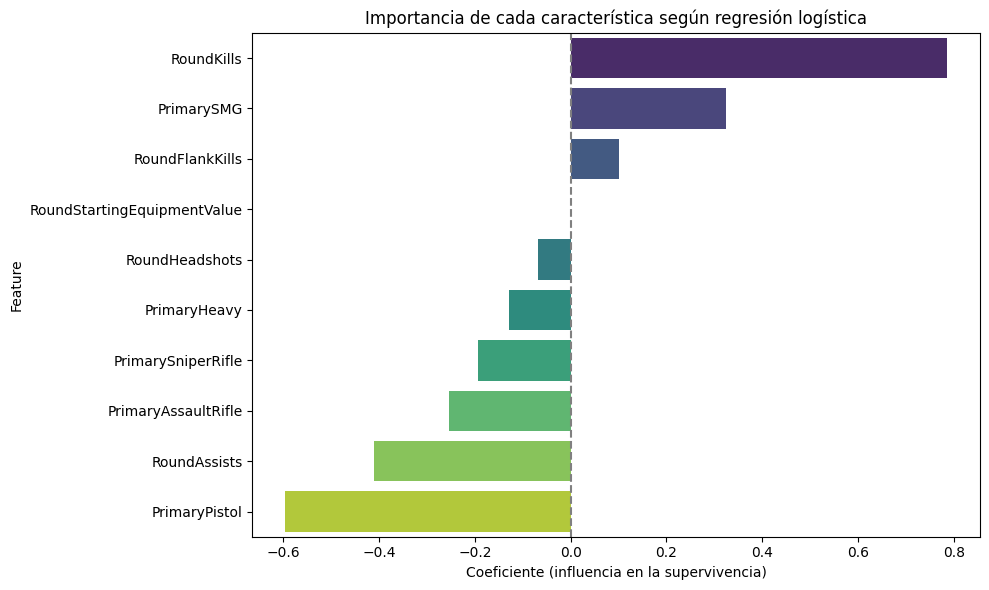

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivencia')
plt.xlabel('¿Sobrevivió la ronda?')
plt.ylabel('Cantidad')
plt.show()

# Definir las columnas a usar
features = [
    'RoundStartingEquipmentValue',
    'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
    'PrimarySMG', 'PrimaryPistol',
    'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills'
]
target = 'Survived'

# Eliminar filas con datos nulos
df_model = df[features + [target]].dropna()

# Separar X e y
X = df_model[features]
y = df_model[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación
print("\nMétricas del modelo de Regresión Logística:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# ========================
# GRÁFICO DE COEFICIENTES
# ========================
coeficientes = model.coef_[0]
features_array = np.array(features)

coef_df = pd.DataFrame({
    'Feature': features_array,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Feature', data=coef_df, palette='viridis')
plt.title('Importancia de cada característica según regresión logística')
plt.xlabel('Coeficiente (influencia en la supervivencia)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

## Interpretación de métricas

El modelo de regresión logística entrenado permite predecir la probabilidad de que un jugador sobreviva o no una ronda, basándose en su equipamiento y desempeño en combate. A continuación se interpretan los principales resultados obtenidos:

- **Precisión general (accuracy):**
  - El modelo acierta en el 68% de los casos. Es decir, 7 de cada 10 predicciones son correctas.

- **Clase False (no sobrevivió):**

  - Precisión: 70%. De todas las veces que el modelo predijo que un jugador no sobreviviría, acertó el 70% de las veces.

  - Recall (sensibilidad): 81%. De todos los jugadores que realmente no sobrevivieron, el modelo detectó correctamente al 81%.

  - F1-score: 75%. Buen equilibrio entre precisión y recall.

- **Clase True (sobrevivió):**

  - Precisión: 63%. Cuando el modelo predijo que un jugador sobreviviría, acertó el 63% de las veces.

  - Recall: 47%. Solo logró identificar correctamente al 47% de los jugadores que realmente sobrevivieron.

  - F1-score: 54%. Menor rendimiento en esta clase, lo que indica dificultad para predecir la supervivencia correctamente.

- **Promedios macro y ponderado:**

  - Macro avg: Considera ambas clases por igual; muestra un rendimiento medio de 64%.

  - Weighted avg: Considera el desbalance entre clases (hay más casos de no supervivencia); muestra un rendimiento promedio ponderado del 66%.



## Conclusión

El modelo predice con mayor eficacia a los jugadores que no sobreviven que a los que sí. Esto puede estar influido por:

- Un posible desbalance en los datos (más jugadores que no sobreviven).

- O porque los factores utilizados explican mejor la no supervivencia.

Para mejorar el modelo, se podría:

- Probar otros algoritmos (como Random Forest o XGBoost).

- Aplicar técnicas de balanceo de clases (como oversampling o SMOTE).

- Incorporar nuevas variables o combinaciones entre ellas.